In [1]:
from itertools import chain, combinations

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

/Users/dimazest/miniconda3/envs/notebook/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
import matplotlib
matplotlib.rc('pdf', fonttype=42)

In [3]:
results = pd.read_csv('results.csv')

In [4]:
parameters = [
    'reduction', 'dimensionality', 'discr', 'cds', 'operator', 'freq', 'corpus',
    'base', 'context_type', 'neg', 'similarity',
]

In [5]:
indexed_results = results.set_index(parameters)

# Lexical

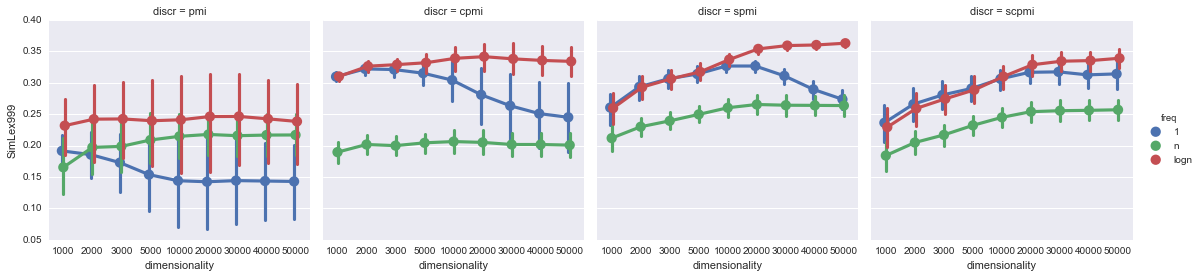

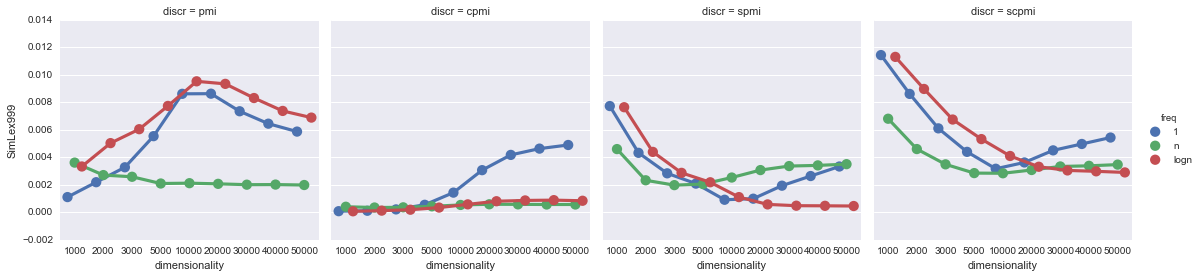

In [6]:
g = sns.factorplot(
    data=results,
    y='SimLex999',
    x='dimensionality',
    hue='freq',
    hue_order=('1', 'n', 'logn'),
    col='discr',
    col_order=('pmi', 'cpmi', 'spmi', 'scpmi'),
    dodge=0.1,
)

g.fig.savefig('figures/SimLex999-performance-mean.pdf')

g = sns.factorplot(
    data=results,
    y='SimLex999',
    x='dimensionality',
    hue='freq',
    hue_order=('1', 'n', 'logn'),
    col='discr',
    col_order=('pmi', 'cpmi', 'spmi', 'scpmi'),
    estimator=np.var,
    ci=None,
    dodge=0.5,
)

g.fig.savefig('figures/SimLex999-performance-var.pdf')

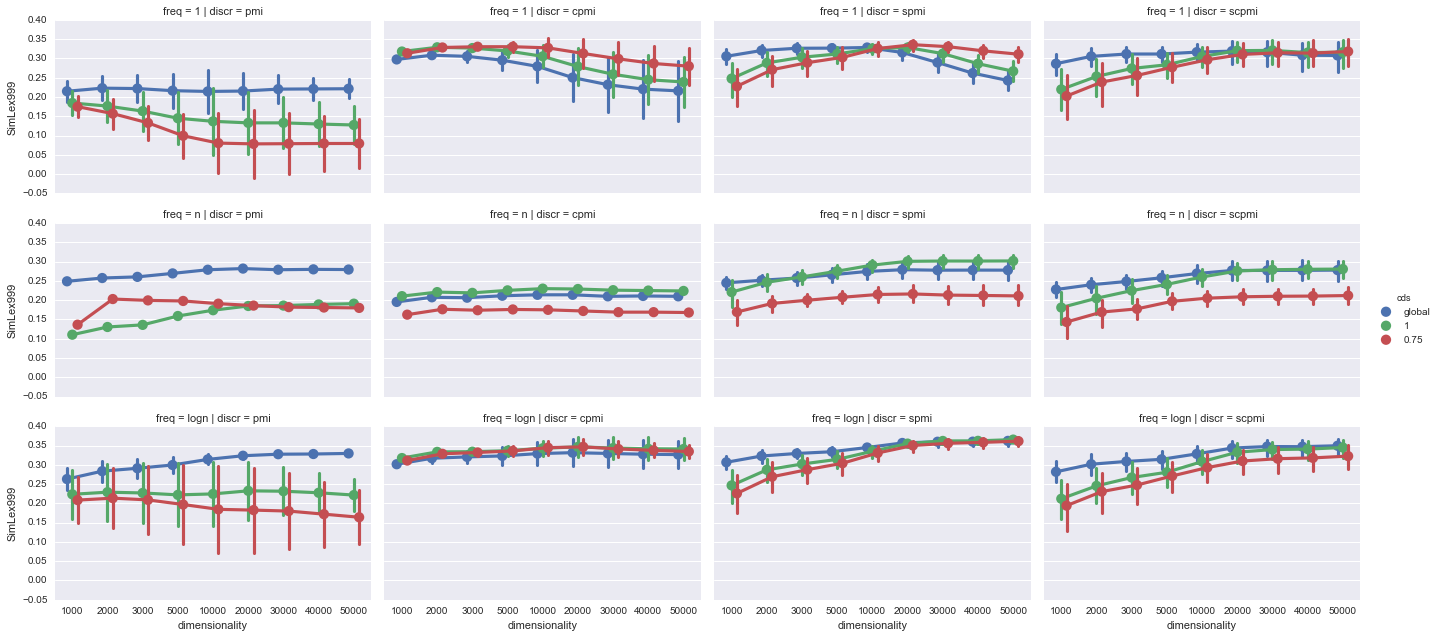

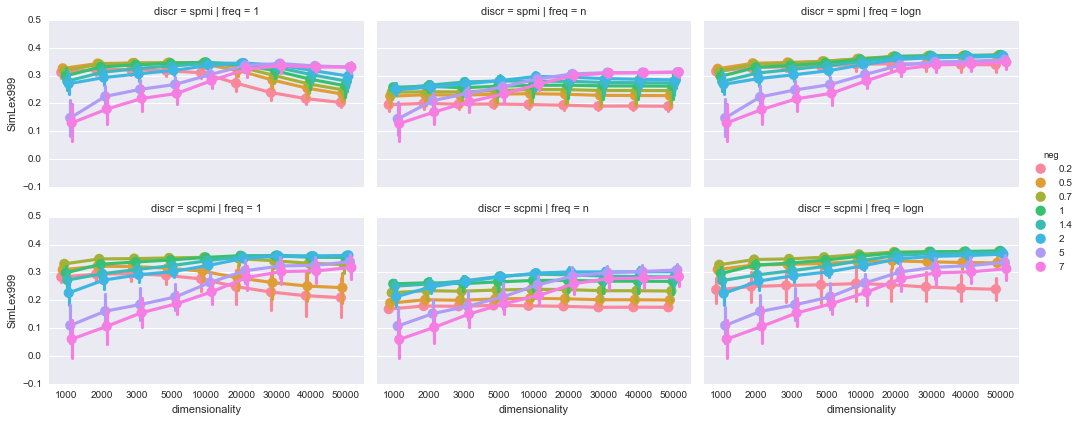

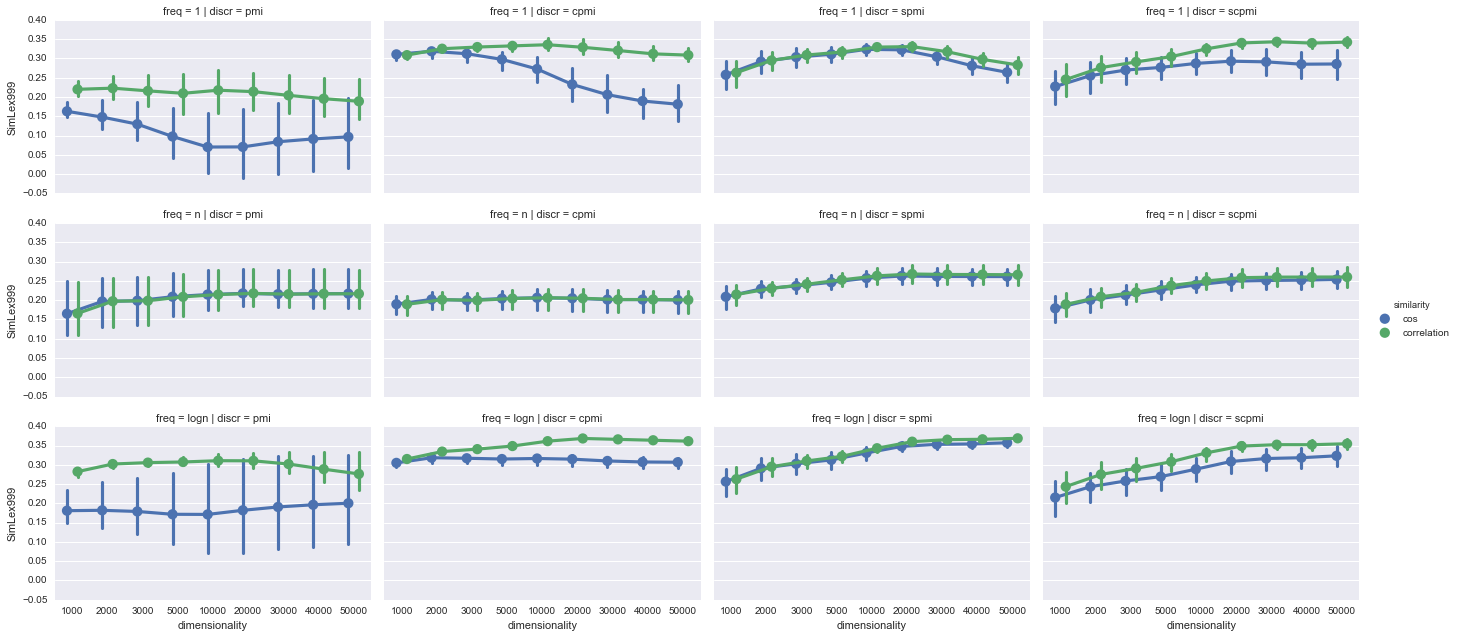

In [7]:
for hue in 'cds', 'neg', 'similarity':
    col='discr'
    col_order=('pmi', 'cpmi', 'spmi', 'scpmi') if hue in ('cds', 'similarity') else ('spmi', 'scpmi')

    row='freq'
    row_order=('1', 'n', 'logn')

    if hue == 'neg':
        col, row = row, col
        col_order, row_order = row_order, col_order
    
    g = sns.factorplot(
        data=results,
        y='SimLex999',
        x='dimensionality',
        hue=hue,
        hue_order={
            'cds': ('global', '1', '0.75'),
            'neg': (0.2, 0.5, 0.7, 1, 1.4, 2, 5, 7),
            'similarity': ('cos', 'correlation'),
        }[hue],
        row=row,
        row_order=row_order,
        col=col,
        col_order=col_order,
        size=3,
        aspect=1.6,
#         sharey=False,
        dodge=0.3,
    )

    g.fig.savefig('figures/SimLex999-interaction-{}.pdf'.format(hue))

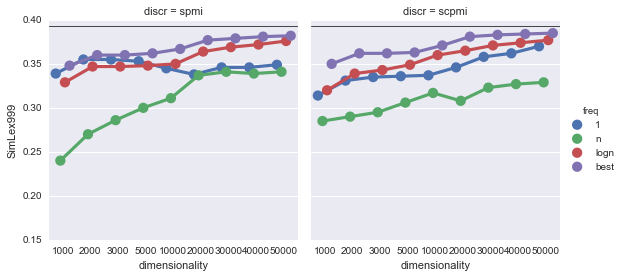

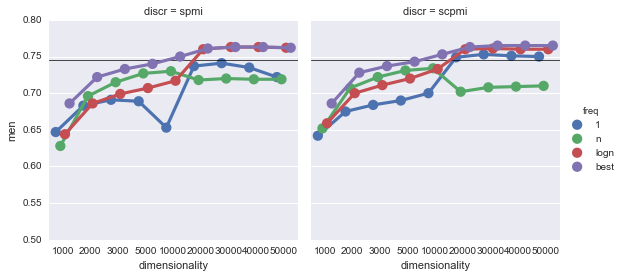

In [8]:
simlex_best = pd.DataFrame(
    results.loc[
        # PMI
        (~(results['discr'] == 'pmi') | (results['cds'] == 'global')) &
        
        # 1CPMI
        (~((results['discr'] == 'cpmi') & ((results['freq'] == '1'))) | (results['cds'] == '0.75')) &
        # NCPMI
        (~((results['discr'] == 'cpmi') & ((results['freq'] == 'n'))) | (results['cds'] == '1')) &
        # logNCPMI
        (~((results['discr'] == 'cpmi') & ((results['freq'] == 'logn'))) | (results['cds'] == '1')) &

        # 1PPMI
        (
            ~((results['discr'] == 'spmi') & (results['freq'] == '1')) | (
                (~(results['dimensionality'] < 20000) | (results['cds'] == 'global')) &
                (~(results['dimensionality'] >= 20000) | (results['cds'] == '0.75'))
            )
        ) &
        (
            ~((results['discr'] == 'spmi') & (results['freq'] == '1')) | (
                (~(results['dimensionality'] < 20000) | (results['neg'] == 0.7)) &
                (~(results['dimensionality'] >= 20000) | (results['neg'] == 5))
            )
        ) &
        
        # NPPMI
        (~((results['discr'] == 'spmi') & ((results['freq'] == 'n'))) | (results['cds'] == '1')) &
        (
            ~((results['discr'] == 'spmi') & (results['freq'] == 'n')) | (
                (~(results['dimensionality'] < 20000) | (results['neg'] == 1.4)) &
                (~(results['dimensionality'] >= 20000) | (results['neg'] == 5))
            )
        ) &
        # logNPPMI
        (
            ~((results['discr'] == 'spmi') & (results['freq'] == 'logn')) | (
                (~(results['dimensionality'] < 20000) | (results['cds'] == 'global')) &
                (~(results['dimensionality'] >= 20000) | (results['cds'] == '0.75'))
            )
        ) &
        (
            ~((results['discr'] == 'spmi') & (results['freq'] == 'logn')) | (
                (~(results['dimensionality'] < 20000) | (results['neg'] == 0.5)) &
                (~(results['dimensionality'] >= 20000) | (results['neg'] == 1.4))
            )
        ) &

        # 1PCPMI
        (
            ~((results['discr'] == 'scpmi') & (results['freq'] == '1')) | (
                (~(results['dimensionality'] < 20000) | (results['cds'] == 'global')) &
                (~(results['dimensionality'] >= 20000) | (results['cds'] == '0.75'))
            )
        ) &
        (
            ~((results['discr'] == 'scpmi') & (results['freq'] == '1')) | (
                (~(results['dimensionality'] < 20000) | (results['neg'] == 0.7)) &
                (~(results['dimensionality'] >= 20000) | (results['neg'] == 2))
            )
        ) &
        # NPCPMI
        (
            ~((results['discr'] == 'scpmi') & (results['freq'] == 'n')) | (
                (~(results['dimensionality'] < 20000) | (results['cds'] == 'global')) &
                (~(results['dimensionality'] >= 20000) | (results['cds'] == '1'))
            )
        ) &
        (
            ~((results['discr'] == 'scpmi') & (results['freq'] == 'n')) | (
                (~(results['dimensionality'] < 20000) | (results['neg'] == 1.4)) &
                (~(results['dimensionality'] >= 20000) | (results['neg'] == 5))
            )
        ) &
        # logNPCPMI
        (
            ~((results['discr'] == 'scpmi') & (results['freq'] == 'logn')) | (
                (~(results['dimensionality'] < 20000) | (results['cds'] == 'global')) &
                (~(results['dimensionality'] >= 20000) | (results['cds'] == '1'))
            )
        ) &
        (
            ~((results['discr'] == 'scpmi') & (results['freq'] == 'logn')) | (
                (~(results['dimensionality'] < 20000) | (results['neg'] == 0.7)) &
                (~(results['dimensionality'] >= 20000) | (results['neg'] == 1.4))
            )
        ) &

        # Similarity
        (~((results['discr'] == 'pmi')) | (results['similarity'] == 'correlation')) &
        (~((results['discr'] == 'cpmi')) | (results['similarity'] == 'correlation')) &
        (
            ~((results['discr'] == 'spmi')) | (
                (~(results['dimensionality'] < 20000) | (results['similarity'] == 'cos')) &
                (~(results['dimensionality'] >= 20000) | (results['similarity'] == 'correlation'))
            )
        ) &
        (~((results['discr'] == 'scpmi')) | (results['similarity'] == 'correlation')) &
    True
    ]
)

simlex_best['selection'] = 'heuristic'

for y, best_result in zip(('SimLex999', 'men'), (0.393, 0.745)):

    _best = results[[y, 'dimensionality', 'discr']].groupby(['dimensionality', 'discr']).max().reset_index()
    _best['freq'] = 'best'
    
    data = pd.concat(
        [
            simlex_best,
            _best,
        ]
    )

    g = sns.factorplot(
        data=data,
        y=y,
        x='dimensionality',
        col='discr',
        col_order=(
            #'pmi',
            #'cpmi',
            'spmi',
            'scpmi',
        ),
        hue='freq',
        hue_order=(
            '1',
            'n',
            'logn',
            'best',
        ),
        dodge=0.5,
    ).set(ylim={'SimLex999': (0.15, 0.4), 'men': (0.5, 0.8)}[y])

    for ax in g.axes[0]:
        ax.axhline(y=best_result, alpha=0.7, linewidth=1, color='black')
    
    g.fig.savefig('figures/{}-best.pdf'.format(y))

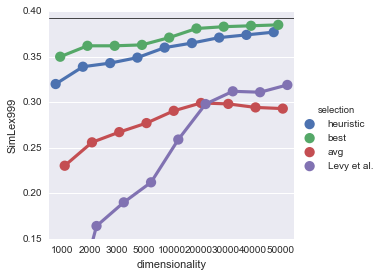

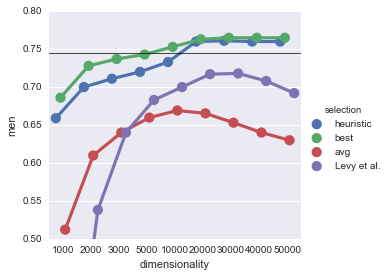

In [9]:
d = pd.DataFrame(
        simlex_best.loc[
        (results['discr'] == 'scpmi') & (results['freq'] == 'logn')
    ]
)
# d['freq'] = 'heuristics'

for y, best_result in zip(('SimLex999', 'men'), (0.393, 0.745)):

    _best = results[[y, 'dimensionality']].groupby(['dimensionality']).max().reset_index()
    _best['selection'] = 'best'

    _avg = results[[y, 'dimensionality']].groupby(['dimensionality']).mean().reset_index()
    _avg['selection'] = 'avg'

    _worst = results[[y, 'dimensionality']].groupby(['dimensionality']).min().reset_index()
    _worst['selection'] = 'worst'

    _levy_best = pd.DataFrame(
            results.loc[
            (results['discr'] == 'spmi') &
            (results['freq'] == '1') &
            (results['cds'] == '0.75') &
            (results['similarity'] == 'cos') &
            (results['neg'] == 5)
        ]
    )
    _levy_best['selection'] = 'Levy et al.'
    
    data = pd.concat(
        [
            d,
            _best,
            _avg,
            _worst,
            _levy_best,
        ]
    )

    g = sns.factorplot(
        data=data,
        y=y,
        x='dimensionality',
        hue='selection',
        hue_order=(
            'heuristic',
            'best',
            'avg',
#             'worst',
            'Levy et al.',
        ),
        dodge=0.5,
#         size=5,
        aspect=1.1,
    ).set(ylim={'SimLex999': (0.15, 0.4), 'men': (0.5, 0.8)}[y])

    for ax in g.axes[0]:
        ax.axhline(y=best_result, alpha=0.7, linewidth=1, color='black')
    
    g.fig.savefig('figures/{}-global-best.pdf'.format(y))

In [10]:
np.round_(results['SimLex999'].max(), 3)

0.38500000000000001

In [11]:
np.round_(results['men'].max(), 3)

0.76500000000000001